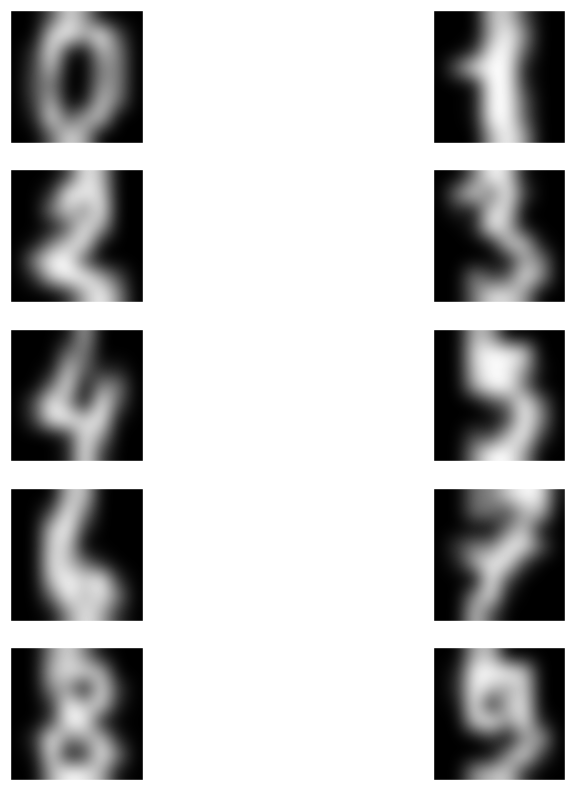



Epoch 1/20


33/33 [==============================] - 1s 6ms/step - loss: 1.5428 - acc: 0.5423 - val_loss: 0.4314 - val_acc: 0.8803
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.3596 - acc: 0.8953 - val_loss: 0.1512 - val_acc: 0.9573
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1727 - acc: 0.9515 - val_loss: 0.1014 - val_acc: 0.9744
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1036 - acc: 0.9743 - val_loss: 0.0795 - val_acc: 0.9658
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0763 - acc: 0.9838 - val_loss: 0.0747 - val_acc: 0.9829
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0470 - acc: 0.9943 - val_loss: 0.0665 - val_acc: 0.9744
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0280 - acc: 0.9971 - val_loss: 0.0632 - val_acc: 0.9829
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0218 - acc: 

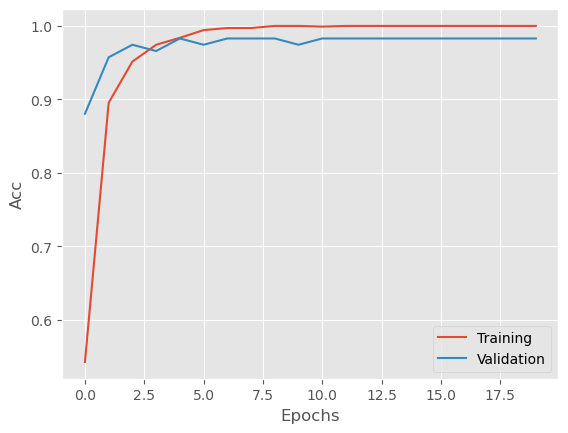

1/1 [==============================] - 0s 67ms/step


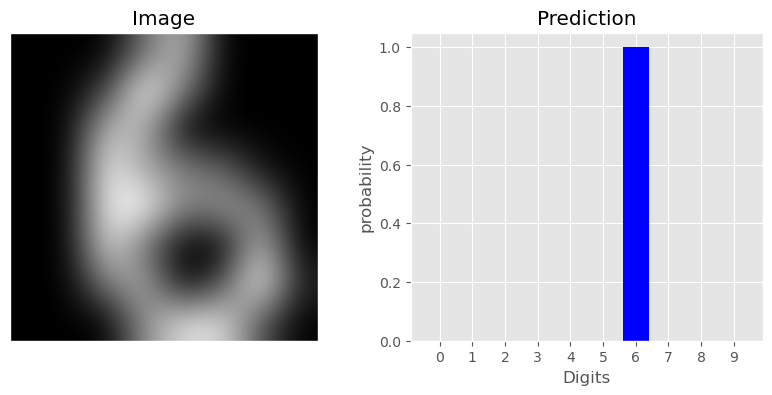

1/1 [==============================] - 0s 14ms/step


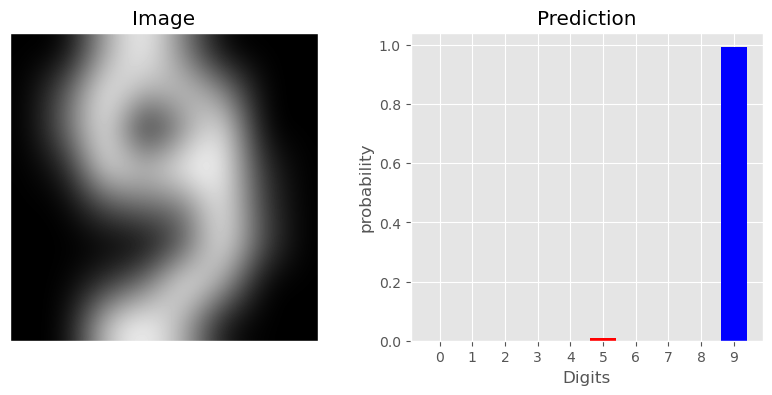

1/1 [==============================] - 0s 11ms/step


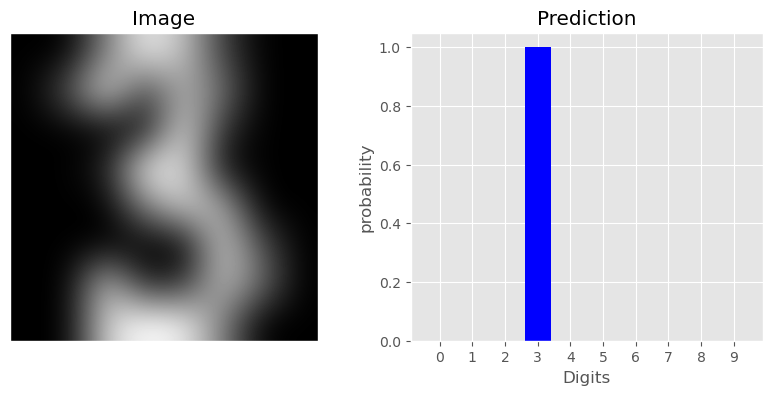

1/1 [==============================] - 0s 16ms/step


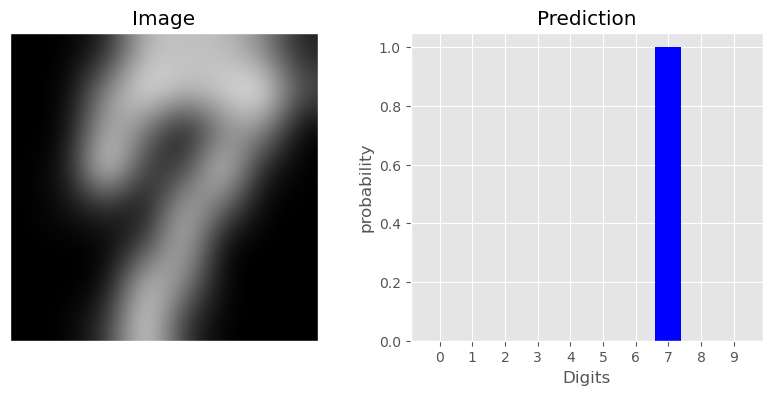

1/1 [==============================] - 0s 10ms/step


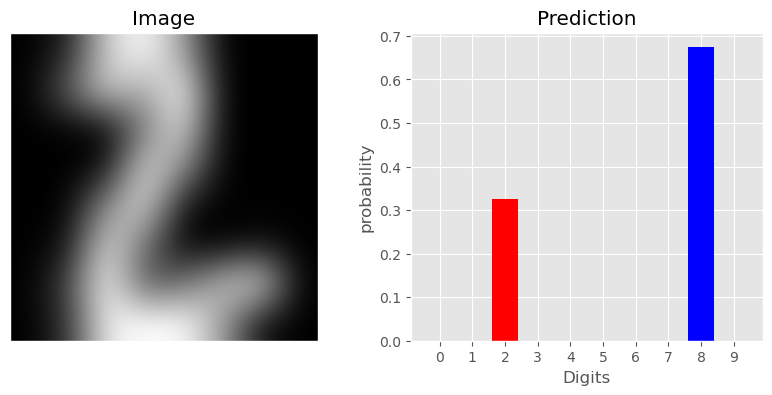

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

df = load_digits().images
df.shape
target = load_digits().target
target.shape
df[0]
target[0]

# Data visualization
plt.style.use('ggplot')
s = 1
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, s)
    plt.imshow(df[i], cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    s += 1
plt.show()

# Classification
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Split data for train and test
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
w, h = df[0].shape
X_train = X_train.reshape(len(X_train), w * h)
X_test = X_test.reshape(len(X_test), w * h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


# Function for models
def Prediction_cat(model, image):
    global w, h
    pred = model.predict(image)
    color = ["red"] * 10
    num = pred.argmax()
    color[num] = "blue"
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(w, h), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.bar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], height=pred.flatten(), color=color)
    plt.xlabel("Digits")
    plt.ylabel("probability")
    plt.title("Prediction")
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.show()


# Model
model = Sequential()
model.add(Dense(64, input_shape=X_train[0].shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
history = model.fit(X_train, y_train_cat, batch_size=32, epochs=20, validation_split=0.1)

# Result
result = model.evaluate(X_test.reshape(629, 64), y_test_cat)
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i], ":", result[i])

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training", "Validation"])
plt.show()

for i in range(5):
    Prediction_cat(model, X_test[i].reshape(1, -1))
